In [1]:
import cvxpy as cp

In [36]:
# Expected Tree Structure
#     @
#    / \
#   @  x3
#  / \
# x1 x2
# 
# Expect x1 = 2, x2 = 2, x3 = 0
# 
x1, x2, x3 = cp.Variable(3)
delta = 2
theta = 1
lam = 1
n = 3

In [37]:
constraints = [
    x1 >= 0,
    x2 >= 0,
    x3 >= 0,
    x3 - delta <= theta - delta,
    x1 - 2 * delta <= theta - delta,
    x2 - 2 * delta <= theta - delta,
    x1 + x2 + x3 <= n,
    x1 + x2 + x3 >= theta,
    x1 + x2 - delta >= theta
]

In [38]:
obj = 0
obj += cp.log(1 - 0.5 * cp.exp((theta - (x1 + x2 + x3)) / lam))
obj += cp.log(1 - 0.5 * cp.exp((theta - (x1 + x2 - delta)) / lam))
obj = cp.Maximize(obj)

In [39]:
prob = cp.Problem(obj, constraints)

In [40]:
prob.solve()

-0.7632130994406191

In [41]:
x1.value, x2.value, x3.value

(1.5000787722511362, 1.499921226797346, -8.905021951023934e-11)

In [ ]:
obj = 0
obj += cp.log(1 - 0.5 * cp.exp((theta - (x1 + x2 + x3)) / lam))
obj += cp.log(1 - 0.5 * cp.exp((theta - (x1 + x2 - delta)) / lam))
obj = cp.Maximize(obj)

<ipython-input-125-90f99c649993>:7: RuntimeWarning: invalid value encountered in log
  y1 = np.log(1 - 0.5 * np.exp((theta - np.maximum(x + 6 - 0, theta-delta)) / lam))


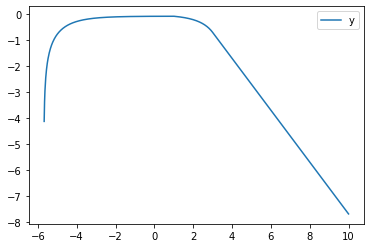

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(-10, 10, 1000)
y1 = np.log(1 - 0.5 * np.exp((theta - np.maximum(x + 6 - 0, theta-delta)) / lam))
y21 = 0.5 * np.exp((theta - np.maximum(x - delta, theta-delta)) / lam)
y21[y21 > 0.5] = 0
y22 = 1 - 0.5 * np.exp(-(theta - np.maximum(x - delta, theta-delta)) / lam)
y22[y22 < 0.5] = 0
y2 = np.log(np.maximum(y21, y22))
y = y1 + y2

fig, ax = plt.subplots()
#sns.lineplot(x=x, y=y1, label='y1')
#sns.lineplot(x=x, y=y2, label='y2')
sns.lineplot(x=x, y=y, label='y')
ax.legend()

Note:

**Conjecture** It is sufficient to constraint x <= theta - d*delta to find the optimal MLE

<AxesSubplot:>

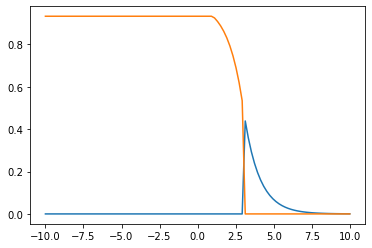

In [114]:
sns.lineplot(x=x, y=y21)
sns.lineplot(x=x, y=y22)

In [112]:
#pd.DataFrame({'x': x, 'y':y})[40:]
np.maximum(np.linspace(0,1) + 1, 1.5)

array([1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.51020408, 1.53061224, 1.55102041, 1.57142857, 1.59183673,
       1.6122449 , 1.63265306, 1.65306122, 1.67346939, 1.69387755,
       1.71428571, 1.73469388, 1.75510204, 1.7755102 , 1.79591837,
       1.81632653, 1.83673469, 1.85714286, 1.87755102, 1.89795918,
       1.91836735, 1.93877551, 1.95918367, 1.97959184, 2.        ])

In [80]:
np.max(x + 5 - 0, )

AxisError: axis 7 is out of bounds for array of dimension 1